In [126]:
from collections import defaultdict
import collections
import matplotlib.pyplot as plt
import bisect
import sys
import math 
import numpy as np

In [152]:
groundTruthFile = "./control/tests/zipf10000b.txt"
groundTruthTailFile = "./control/tests/tailzipf10000b.txt"
calculatedFile = "./control/outputs/outzipf10000b.txt"
calculatedTailFile = "./control/outputs/outtailzipf10000b.txt"

In [153]:
f1 = open(groundTruthFile, "r")
f2 = open(groundTruthTailFile, "r")
f3 = open(calculatedFile, "r")
f4 = open(calculatedTailFile, "r")

In [154]:
def max_quantile_diff(q1, q2):
    i = 0
    result = 0
    while i<len(q1) and i <len(q2):
        result = max(result, abs(q1[i] - q2[i]))
        i+=1
    while i<len(q1):
        result = max(result, abs(q1[i] - q2[-1]))
        i+=1
    while i<len(q2):
        result = max(result, abs(q1[-1] - q2[i]))
        i+=1
    return result

def ARE_freq_diff(true_q, estimated_q):
    prevPhi = 0
    ans = []
    for freq, phi in enumerate(true_q):
        if freq != 0 and prevPhi != phi: # query only once for each phi
            prevPhi = phi
            estimated_freq = bisect.bisect_left(estimated_q, phi) - 1
            ans.append( abs(freq - estimated_freq) / freq)
    return 1.0 * sum(ans) / len(ans)

In [155]:
groundTruth = []
while(True):
    line = f1.readline()
    if not line:
        break
    latency = float(line)
    groundTruth.append(latency)

calculated = []
while(True):
    line = f3.readline()
    if not line:
        break
    latency = float(line)
    calculated.append(latency)
    
groundTruthTail = {}
while(True):
    line = f2.readline()
    if not line:
        break
    line = line.split()
    groundTruthTail[line[0] + line[1] + line[2] + line[3]] = float(line[4])

calculatedTail = {}
while(True):
    line = f4.readline()
    if not line:
        break
    line = line.split()
    calculatedTail[line[0] + line[1] + line[2] + line[3]] = float(line[4])
    

In [156]:
print(groundTruth)
print(calculated)

[0.016, 0.011, 1.261, 0.003, 0.034, 0.003, 0.001, 2.246, 0.434, 0.863, 0.647, 0.001, 0.919, 0.02, 0.001, 0.323, 0.293, 0.001, 0.452, 0.003, 0.022, 0.002, 0.006, 0.009, 0.041, 0.062, 0.032, 0.704, 0.288, 0.763, 0.001, 0.016, 0.002, 0.001, 0.269, 0.028, 0.818, 0.001, 1.907, 1.997, 0.062, 0.002, 0.088, 0.171, 0.084, 0.001, 0.004, 0.018, 0.301, 0.023, 0.002, 0.002, 1.257, 2.663, 0.001, 0.833, 0.008, 0.52, 0.008, 0.234, 0.067, 0.03, 0.451, 0.431, 0.002, 0.191, 0.105, 0.001, 0.759, 0.034, 0.006, 0.004, 1.732, 0.001, 0.007, 0.001, 1.905, 0.003, 1.192, 0.001, 0.232, 0.001, 0.001, 0.001, 1.274, 1.085, 0.002, 1.74, 0.037, 2.419, 0.025, 0.002, 0.735, 0.099, 0.117, 0.439, 0.019, 0.961, 0.018, 0.003, 0.009, 1.33, 0.012, 0.003, 1.275, 0.921, 0.64, 0.007, 0.001, 0.003, 0.064, 0.25, 0.014, 0.057, 0.31, 0.895, 0.819, 1.116, 0.186, 0.022, 0.029, 0.019, 0.016, 0.001, 0.015, 0.169, 0.001, 1.281, 0.001, 2.487, 0.285, 0.054, 0.26, 0.003, 0.003, 0.102, 0.447, 0.001, 0.028, 0.001, 0.003, 0.001, 0.001, 0.672, 

In [157]:
print(groundTruthTail)
print(calculatedTail)

{'0.0.131.2180.0.23.136275450812': 2.246, '0.0.190.1120.0.232.2511691361983': 2.663, '0.0.195.1340.0.243.88877021455': 2.419, '0.0.0.2310.0.79.02253911863': 2.487, '0.0.114.440.0.241.80170443586': 2.54, '0.0.130.60.0.129.865174626425': 2.698, '0.0.206.270.0.124.1095862439823': 2.693, '0.0.187.2350.0.194.683966423891': 2.294, '0.0.216.890.0.211.405907125285': 2.216, '0.0.135.1300.0.215.2095795023112': 2.306, '0.0.1.2010.0.190.2396502749015': 2.057, '0.0.177.710.0.15.1781803050384': 2.133, '0.0.99.650.0.3.2052242432162': 2.831, '0.0.38.1330.0.19.2181211654084': 2.744, '0.0.34.1380.0.75.191502436441': 2.021, '0.0.50.90.0.127.13375952585': 2.567, '0.0.110.1370.0.26.152300828412': 2.682, '0.0.84.1750.0.58.201488120047': 2.383, '0.0.115.20.0.166.165132517785': 2.941, '0.0.30.10.0.93.1973352811427': 2.999, '0.0.36.1440.0.143.2116086434149': 2.314, '0.0.193.2120.0.130.11414781386': 2.336, '0.0.191.830.0.83.2321583011109': 2.565, '0.0.215.1660.0.99.132226157565': 2.478, '0.0.193.2390.0.27.48475

 ## Latency graph

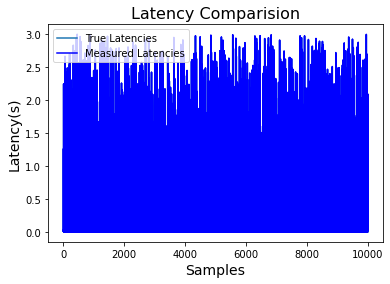

In [158]:
plt.title("Latency Comparision", fontsize=16) 
                
            
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Latency(s)', fontsize=14)

    
plt.plot([i for i in range(len(groundTruth))], groundTruth, label='True Latencies')   
plt.plot([i for i in range(len(calculated))], calculated, 'b', label='Measured Latencies')

plt.legend(prop={ 'size': 10 })

plt.show()

In [159]:
MSE = np.square(np.subtract(groundTruth,calculated)).mean()
print("MSE: ", MSE)

MSE:  1.306490000000001e-05


## Latency Distribution

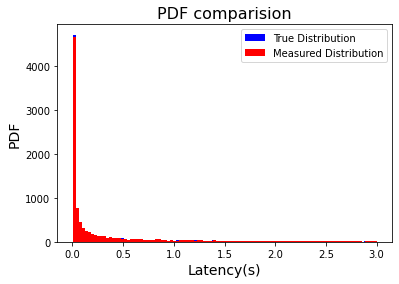

In [160]:
hx, hy, _ = plt.hist(groundTruth, bins=100,color="blue", label="True Distribution")
hx2, hy2, _ = plt.hist(calculated, bins=100,color="red", label="Measured Distribution")
plt.title('PDF comparision', fontsize=16)
plt.xlabel('Latency(s)', fontsize=14)
plt.ylabel('PDF', fontsize=14)

#plt.savefig("cumulative_density_distribution_01.png", bbox_inches='tight')
plt.legend(prop={ 'size': 10 })
plt.show()
plt.close()

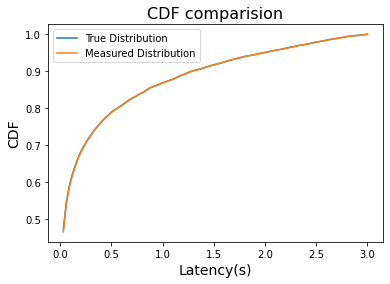

In [165]:
dx = hy[1] - hy[0]
dx2 = hy2[1] - hy2[0]
F1 = np.cumsum(hx)*dx
F1 = F1/np.max(F1)
F2 = np.cumsum(hx2)*dx2
F2 = F2/np.max(F2)
plt.plot(hy[1:], F1, label="True Distribution")
plt.plot(hy2[1:], F2, label="Measured Distribution")

plt.title('CDF comparision', fontsize=16)
plt.xlabel('Latency(s)', fontsize=14)
plt.ylabel('CDF', fontsize=14)

plt.legend(prop={ 'size': 10 })
plt.show()
plt.close()

In [166]:
print("Max Quantile Difference", max_quantile_diff(F1, F2))

Max Quantile Difference 0.005700000000000094


In [167]:
print("Average Relitive error", ARE_freq_diff(F1, F2))

Average Relitive error 0.000748041710258549


## Correct tail flows

In [138]:
print("Ground Truth Length", len(groundTruthTail.values())) 

Ground Truth Length 495


In [139]:
print("Measured Length", len(calculatedTail.values())) 

Measured Length 498


In [140]:
print("Values Missed: ", len(groundTruthTail.values())-len(calculatedTail.values()))

Values Missed:  -3


In [141]:
groundTruthTail

{'0.0.131.2180.0.23.136275450812': 2.246,
 '0.0.190.1120.0.232.2511691361983': 2.663,
 '0.0.195.1340.0.243.88877021455': 2.419,
 '0.0.0.2310.0.79.02253911863': 2.487,
 '0.0.114.440.0.241.80170443586': 2.54,
 '0.0.130.60.0.129.865174626425': 2.698,
 '0.0.206.270.0.124.1095862439823': 2.693,
 '0.0.187.2350.0.194.683966423891': 2.294,
 '0.0.216.890.0.211.405907125285': 2.216,
 '0.0.135.1300.0.215.2095795023112': 2.306,
 '0.0.1.2010.0.190.2396502749015': 2.057,
 '0.0.177.710.0.15.1781803050384': 2.133,
 '0.0.99.650.0.3.2052242432162': 2.831,
 '0.0.38.1330.0.19.2181211654084': 2.744,
 '0.0.34.1380.0.75.191502436441': 2.021,
 '0.0.50.90.0.127.13375952585': 2.567,
 '0.0.110.1370.0.26.152300828412': 2.682,
 '0.0.84.1750.0.58.201488120047': 2.383,
 '0.0.115.20.0.166.165132517785': 2.941,
 '0.0.30.10.0.93.1973352811427': 2.999,
 '0.0.36.1440.0.143.2116086434149': 2.314,
 '0.0.193.2120.0.130.11414781386': 2.336,
 '0.0.191.830.0.83.2321583011109': 2.565,
 '0.0.215.1660.0.99.132226157565': 2.478,
 

In [145]:
measured = list(calculatedTail.values())
measured2 = []
true = []
for key in calculatedTail.keys():

    if key in groundTruthTail:
        true.append(groundTruthTail[key])
        measured2.append(calculatedTail[key])
print(true)

[2.246, 2.663, 2.419, 2.487, 2.54, 2.698, 2.693, 2.294, 2.216, 2.306, 2.057, 2.133, 2.831, 2.744, 2.021, 2.567, 2.682, 2.383, 2.941, 2.999, 2.314, 2.336, 2.565, 2.478, 2.964, 2.255, 2.551, 2.888, 2.327, 2.022, 2.476, 2.589, 2.046, 2.613, 2.195, 2.508, 2.712, 2.304, 2.596, 2.389, 2.558, 2.83, 2.529, 2.313, 2.981, 2.34, 2.131, 2.447, 2.233, 2.105, 2.757, 2.455, 2.082, 2.826, 2.857, 2.534, 2.614, 2.471, 2.908, 2.902, 2.646, 2.11, 2.184, 2.887, 2.796, 2.778, 2.289, 2.967, 2.39, 2.644, 2.046, 2.339, 2.79, 2.694, 2.76, 2.188, 2.733, 2.357, 2.08, 2.78, 2.437, 2.126, 2.79, 2.074, 2.259, 2.157, 2.125, 2.078, 2.308, 2.67, 2.52, 2.618, 2.641, 2.022, 2.586, 2.805, 2.484, 2.363, 2.174, 2.053, 2.523, 2.882, 2.489, 2.225, 2.738, 2.049, 2.083, 2.586, 2.772, 2.833, 2.173, 2.804, 2.433, 2.144, 2.246, 2.42, 2.525, 2.29, 2.572, 2.407, 2.304, 2.527, 2.32, 2.426, 2.44, 2.265, 2.058, 2.916, 2.091, 2.674, 2.212, 2.937, 2.335, 2.135, 2.077, 2.423, 2.005, 2.086, 2.477, 2.724, 2.366, 2.564, 2.605, 2.564, 2.031, 

In [146]:
print("Ground Truth Length", len(true)) 

Ground Truth Length 495


In [147]:
print("Measured Length", len(measured2)) 

Measured Length 495


In [148]:
print("Values Missed: ", len(true)-len(measured2))

Values Missed:  0


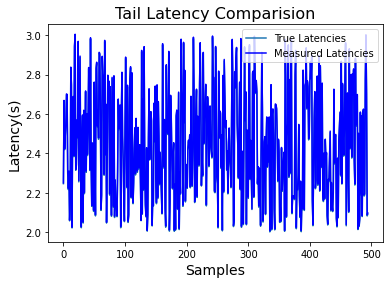

In [150]:
plt.title("Tail Latency Comparision", fontsize=16) 
                
            
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Latency(s)', fontsize=14)

    
plt.plot([i for i in range(len(true))], true, label='True Latencies')   
plt.plot([i for i in range(len(measured2))], measured2, 'b', label='Measured Latencies')

plt.legend(prop={ 'size': 10 })

plt.show()

In [151]:
MSE = np.square(np.subtract(true, measured2)).mean()
print("MSE: ", MSE)

MSE:  3.4751515151515257e-05
